## Examples of using the Mondrian forest and tree classifiers (not online versions).

In [1]:
include("Mondrian_Forest_Classifier.jl")

show_mondrian_split_2d

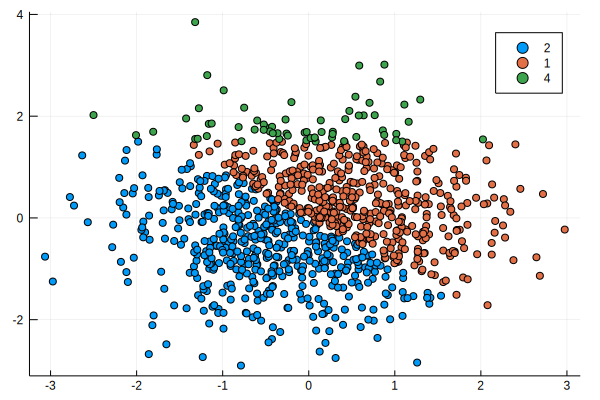

In [2]:
using MLBase
using Plots

function Fakedata3Classif(N,d,N_test=0)
    X = randn((N,d))
    param1 = randn(d)
    param2 = randn(d)
    Y = ( sum(X*param1,2) .> mean(sum(X*param2,2)) )
    Y=convert(Array{Int},Y)
    for i in 1:size(X,1)
        if X[i,2] > 1.5
            Y[i] = 3
        end
    end
    if (N_test > 0)
        x = randn((N_test,d))
        y = ( sum(x*param1,2) .> mean(sum(x*param2,2)) )
        y=convert(Array{Int},y)
        for i in 1:size(x,1)
            if x[i,2] > 1.5
                y[i] = 3
            end
        end
        return X,Y,x,y
    end
    return X,Y
end

X, Y, x, y = Fakedata3Classif(1000,2,1000);
Y = Y.+1;
y = y.+1;

if size(X,2)==2
    plot()
    for class in unique(Y)
        scatter!(X[Y.==class,1],X[Y.==class,2],label="$class")
    end
    plot!()
end

## Mondrian tree classifier

In [3]:
# initialise a mondreian tree classifier object with an empty tree
# and empty data. NB the underlying mondrian tree can be accessed by MT.Tree (see visualisation)
MT = Mondrian_Tree_Classifier()
# trains the tree and sets MT.X and MT.Y to the given training data
train!(MT,X,Y,1e16)

# predict on training and testing
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MT, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

# give the raw probs
predict_proba!(MT,x[1:10,:])

Train Accuracy
0.818
Accuracy
0.804


10-element Array{Any,1}:
 [1.0, 0.0, 0.0]          
 [0.809231, 0.190769, 0.0]
 [0.0, 1.0, 0.0]          
 [0.0, 1.0, 0.0]          
 [0.0, 1.0, 0.0]          
 [0.809231, 0.190769, 0.0]
 [0.809231, 0.190769, 0.0]
 [0.606299, 0.393701, 0.0]
 [0.0, 1.0, 0.0]          
 [0.0, 1.0, 0.0]          

In [4]:
# repl output
MT

In [5]:
# the data has been added
println(MT.X[1:10,:])
println(MT.Y[1:10])

Mondrian Tree Classifier:
    Mondrian Tree with 26 leaves[-0.509687 -0.421702; 0.151716 0.47238; 0.307153 -1.09481; 0.573973 1.1423; -1.67015 0.545025; -1.04327 -0.887693; 1.25943 -2.843; -0.593173 -1.6259; 0.362384 0.232299; 1.10525 1.43289]
[2, 1, 2, 1, 2, 2, 2, 2, 1, 1]


## Visualisation

Based on DecisionTree.jl print_tree function. TODO draw with Graphs.jl

In [6]:
MT = Mondrian_Tree_Classifier()
# low λ value to show the plotting
train!(MT,X,Y,0.6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# print the text based vis
print_mondrian_tree(get(MT.Tree.root))

Train Accuracy
0.804
τ: 0.011
L-> Prediction: [0.0, 1.0, 0.0]
R-> τ: 0.058
    L-> τ: 0.365
        L-> τ: 0.4
            L-> Prediction: [0.05, 0.95, 0.0]
            R-> τ: 0.475
                L-> Prediction: [0.207, 0.793, 0.0]
                R-> Prediction: [0.855, 0.145, 0.0]
        R-> Prediction: [0.906, 0.094, 0.0]
    R-> Prediction: [NaN, NaN, NaN]


### The splits can be visualised for an individual Mondrian_Tree_Classifier

Here a plot and animation are returned, plot is the final still. If animation=false
then a one frame animation and plot are returned (both the final plot).

In [7]:
X, Y, x, y = FakedataClassif(100,2,25);
Y = Y.+1;
y = y.+1;

MT = Mondrian_Tree_Classifier()
train!(MT,X,Y,1e6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# plots the splits for a Mondrian_Tree_Classifier in 2_d could do
# higher d but would only plot dimension 1,2
f,a = show_mondrian_split_2d(MT,Data=true,animation=true);
gif(a,"resources/MT.gif",fps=1)

Train Accuracy
0.95


INFO: Saved animation to /home/harvey/Group Project/warwick-rsg/MondrianForest/resources/MT.gif


Plots.AnimatedGif("/home/harvey/Group Project/warwick-rsg/MondrianForest/resources/MT.gif")

# Mondrian Forest classifier

Python has $\sim 27 - 33$ seconds runtime, $\sim 276-619$ MiB of memory allocations, and about $0.8-0.92$ accuracy on an
equivalent problem

See [python comparison](comparisons/python_comp.ipynb) and the plots below. S


![alt text](comparisons/n_tree_scale.png)

Yet to update data scale with paused mondrians and parallel training

![alt text](comparisons/n_data_scale.png)

In [8]:
X, Y, x, y = FakedataClassif(1000,5,100);
Y = Y.+1;
y = y.+1;

# creates a mondrian forest classifier with 100 mondrian tree classifiers
MF = Mondrian_Forest_Classifier(100)
# time and memory separately
tic()
train!(MF, X, Y, 1e9)
toc()
# prediction is greatest time hog
tic()
pred=predict!(MF, X);
toc()
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MF, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

MF = Mondrian_Forest_Classifier(100)
println("Allocations: ", @allocated(train!(MF,X,Y,1e9))/1e6, " Mb")

elapsed time: 0.392889573 seconds
elapsed time: 0.805767225 seconds
Train Accuracy
0.973
Accuracy
0.97
Allocations: 0.002416 Mb


In [9]:
predict_proba!(MF,x[1:10,:])

10-element Array{Array{Float64,1},1}:
 [0.872956, 0.127044]
 [0.671005, 0.328995]
 [0.259981, 0.740019]
 [0.683416, 0.316584]
 [0.830681, 0.169319]
 [0.649329, 0.350671]
 [0.708601, 0.291399]
 [0.832892, 0.167108]
 [0.288114, 0.711886]
 [0.587114, 0.412886]

In [14]:
# repl output
MF

Mondrian Forest Classifier with 512 Mondrian trees:
    Mondrian Tree with 4 leaves
    Mondrian Tree with 65 leaves
    Mondrian Tree with 85 leaves
    Mondrian Tree with 127 leaves
    Mondrian Tree with 130 leaves
    Mondrian Tree with 88 leaves
    Mondrian Tree with 91 leaves
    Mondrian Tree with 99 leaves
    Mondrian Tree with 43 leaves
    Mondrian Tree with 45 leaves
    Mondrian Tree with 99 leaves
    Mondrian Tree with 71 leaves
    Mondrian Tree with 18 leaves
    Mondrian Tree with 51 leaves
    Mondrian Tree with 72 leaves
    Mondrian Tree with 95 leaves
    Mondrian Tree with 9 leaves
    Mondrian Tree with 62 leaves
    Mondrian Tree with 37 leaves
    Mondrian Tree with 51 leaves
    Mondrian Tree with 39 leaves
    Mondrian Tree with 85 leaves
    Mondrian Tree with 21 leaves
    Mondrian Tree with 90 leaves
    Mondrian Tree with 31 leaves
    Mondrian Tree with 77 leaves
    Mondrian Tree with 7 leaves
    Mondrian Tree with 80 leaves
    Mondrian Tree with 38

 leaves
    Mondrian Tree with 69 leaves
    Mondrian Tree with 33 leaves
    Mondrian Tree with 76 leaves
    Mondrian Tree with 79 leaves
    Mondrian Tree with 114 leaves
    Mondrian Tree with 90 leaves
    Mondrian Tree with 35 leaves
    Mondrian Tree with 69 leaves
    Mondrian Tree with 99 leaves
    Mondrian Tree with 66 leaves
    Mondrian Tree with 37 leaves
    Mondrian Tree with 9 leaves
    Mondrian Tree with 24 leaves
    Mondrian Tree with 43 leaves
    Mondrian Tree with 63 leaves
    Mondrian Tree with 56 leaves
    Mondrian Tree with 30 leaves
    Mondrian Tree with 94 leaves
    Mondrian Tree with 72 leaves
    Mondrian Tree with 122 leaves
    Mondrian Tree with 89 leaves
    Mondrian Tree with 35 leaves
    Mondrian Tree with 34 leaves
    Mondrian Tree with 49 leaves
    Mondrian Tree with 46 leaves
    Mondrian Tree with 4 leaves
    Mondrian Tree with 66 leaves
    Mondrian Tree with 75 leaves
    Mondrian Tree with 124 leaves
    Mondrian Tree with 93 leaves
 

# MLBase Gridtune

Something is wrong here

In [12]:
d=2
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

# Currently adding @parallel to the for loop in train! causes
# train! within MLBase's gridtune to be unable to modify the
# Mondrian_Forest_Classfier Trees array....
function train_for_mlbase!(MF::Mondrian_Forest_Classifier,
                X::Array{Float64,2},
                Y::Array{Int64},
                λ::Float64=1e9)

    for i in 1:MF.n_trees
        MT = Mondrian_Tree_Classifier()
        train!(MT, X, Y, λ)
        push!(MF.Trees,MT)
    end
    MF.X = X
    MF.Y = Y
end

function estfun(n_trees,λ)
    MF = Mondrian_Forest_Classifier()
    train_for_mlbase!(MF,X,Y,λ)
    return MF
end

function evalfun(MF)
    return correctrate(y, predict!(MF,x))
end

@time best_model, best_config, best_score = gridtune(estfun, 
                                               evalfun, 
                                               ("n_trees",[10,100,250,500]),
                                               ("λ",[1e1,1e2,1e4,1e8,1e16]),
                                               verbose=true
)
println("\nBest Configuration: ", best_config)
println("\nBest score: ", best_score)

[n_trees=10, λ=10.0] => 0.98
[n_trees=100, λ=10.0] => 1.0
[n_trees=250, λ=10.0] => 0.98
[n_trees=500, λ=10.0] => 0.97
[n_trees=10, λ=100.0] => 0.98
[n_trees=100, λ=100.0] => 0.98
[n_trees=250, λ=100.0] => 0.99
[n_trees=500, λ=100.0] => 0.99
[n_trees=10, λ=10000.0] => 1.0
[n_trees=100, λ=10000.0] => 1.0
[n_trees=250, λ=10000.0] => 0.99
[n_trees=500, λ=10000.0] => 1.0
[n_trees=10, λ=1.0e8] => 1.0
[n_trees=100, λ=1.0e8] => 0.99
[n_trees=250, λ=1.0e8] => 0.96
[n_trees=500, λ=1.0e8] => 0.99
[n_trees=10, λ=1.0e16] => 0.99
[n_trees=100, λ=1.0e16] => 0.99
[n_trees=250, λ=1.0e16] => 0.99
[n_trees=500, λ=1.0e16] => 0.98
  3.399334 seconds (28.33 M allocations: 875.626 MiB, 10.31% gc time)

Best Configuration: (100, 10.0)

Best score: 1.0


This benchmark is a little unbelievable... but the accuracy is still good, perhaps it is the
paused mondrians (the python does use these though) or Julia's time function is not working 

4.5693e-5
  0.000980 seconds (29.52 k allocations: 576.078 KiB)
2
5.9175e-5
  0.002778 seconds (84.46 k allocations: 1.454 MiB)
4
3.8202e-5
  0.005352 seconds (155.29 k allocations: 2.641 MiB)
8
3.7305e-5
  0.016211 seconds (295.34 k allocations: 4.990 MiB, 39.01% gc time)
16
3.6601e-5
  0.018870 seconds (622.00 k allocations: 10.405 MiB)
32
4.4083e-5
  0.050016 seconds (1.19 M allocations: 19.938 MiB, 14.58% gc time)
64
4.2582e-5
  0.075926 seconds (2.26 M allocations: 37.885 MiB, 6.99% gc time)
128
3.5029e-5
  0.172370 seconds (4.50 M allocations: 75.527 MiB, 10.36% gc time)
256
3.9765e-5
  0.301115 seconds (9.14 M allocations: 153.068 MiB, 12.07% gc time)
512
Any[4.5693e-5, 5.9175e-5, 3.8202e-5, 3.7305e-5, 3.6601e-5, 4.4083e-5, 4.2582e-5, 3.5029e-5, 3.9765e-5]
Any[0.68, 0.82, 0.82, 0.9, 0.94, 0.91, 0.92, 0.95, 0.94]


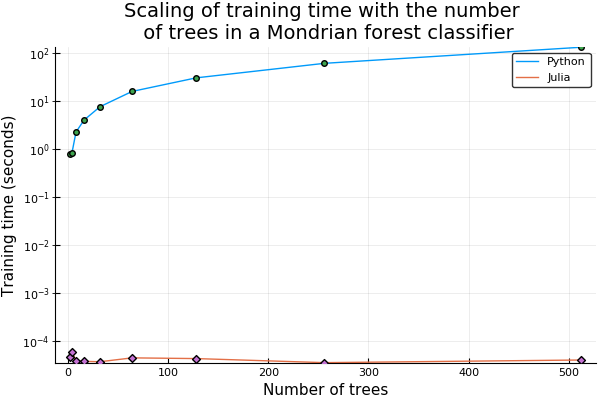

In [13]:
d=5
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

time = []
acc = []
trees = []
for j in collect(1:9)
    push!(trees,2^j)
    MF = Mondrian_Forest_Classifier(2^j)
    tic()
    train!(MF,X,Y,1e9)
    t = toq()
    println(t)
    push!(time,t)
    @time pred=predict!(MF, x);
    push!(acc,correctrate(y,convert(Array{Int,1},pred)))
    println(MF.n_trees)
end

println(time)
println(acc)

using CSV
times_py = convert(Array{Float64,1},CSV.read("comparisons/times_py")[2])
pyplot()

plot(trees,times_py,label="Python", yscale=:log10)
plot!(trees,time,label="Julia", yscale=:log10)
scatter!(trees,times_py,label="")
scatter!(trees,time,label="",markershape=:auto)
title!("Scaling of training time with the number \n of trees in a Mondrian forest classifier")
xlabel!("Number of trees")
ylabel!("Training time (seconds)")